# Importing Python Libraries

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

# Importing data and checking the summary of data

In [3]:
df=pd.read_csv('/Users/Hp/OneDrive/Desktop/datasets/SCSP.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

# Data Cleaning

*Dropping columns which are not required for analysis*

In [5]:
df.drop(['Item Description','Molecule/Test Type'],axis=1,inplace=True)

In [6]:
df.shape

(10324, 31)

In [7]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

Filtering out data and updating df

In [8]:
df=df[df['Weight (Kilograms)']!="Weight Captured Seperately"]
df[df['Weight (Kilograms)']=="Weight Captured Seperately"].shape

(0, 31)

In [9]:
df=df[df['Freight Cost (USD)']!="Invoiced Seperately"]
df[df['Freight Cost (USD)']=="Invoiced Seperately"].shape

(0, 31)

In [10]:
df=df[df['Freight Cost (USD)']!="Freight Included in Commodity Cost"]
df[df['Freight Cost (USD)']=="Freight Included in Commodity Cost"].shape

(0, 31)

In [11]:
df.shape

(8882, 31)

Changing datatype of Weight(Kilograms) and Freight Cost(USD)

In [12]:
df['Weight (Kilograms)']=pd.to_numeric(df['Weight (Kilograms)'],errors='coerce')
df['Freight Cost (USD)']=pd.to_numeric(df['Freight Cost (USD)'],errors='coerce')

In [13]:
df[['Weight (Kilograms)','Freight Cost (USD)']].dtypes

Weight (Kilograms)    float64
Freight Cost (USD)    float64
dtype: object

Handling Data Columns

In [14]:
df[['PQ First Sent to Client Date','PO Sent to Vendor Date',
    'Scheduled Delivery Date','Delivered to Client Date',
    'Delivery Recorded Date']]

,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date
0,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06
1,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06
2,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06
3,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06
4,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06
...,...,...,...,...,...
10316,5/4/15,N/A - From RDC,2-Jun-15,15-May-15,22-May-15
10317,5/4/15,N/A - From RDC,30-Jun-15,22-Jun-15,29-Jun-15
10318,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15
10319,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15


In [15]:
df['PQ First Sent to Client Date'].value_counts()

Pre-PQ Process       2093
Date Not Captured     203
11/21/11               90
3/10/11                79
3/18/10                76
                     ... 
12/17/13                1
9/21/10                 1
8/4/14                  1
11/7/12                 1
8/29/13                 1
Name: PQ First Sent to Client Date, Length: 738, dtype: int64

In [16]:
df['PO Sent to Vendor Date'].value_counts()

N/A - From RDC       5218
Date Not Captured     100
3/19/10                76
9/24/10                48
2/20/15                43
                     ... 
3/27/12                 1
6/21/11                 1
5/1/12                  1
9/13/13                 1
8/29/12                 1
Name: PO Sent to Vendor Date, Length: 827, dtype: int64

Changing datatype of Columns to date

In [17]:
df[['Scheduled Delivery Date','Delivered to Client Date',
    'Delivery Recorded Date']].dtypes

Scheduled Delivery Date     object
Delivered to Client Date    object
Delivery Recorded Date      object
dtype: object

In [18]:
df['Scheduled Delivery Date']=pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date']=pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date']=pd.to_datetime(df['Delivery Recorded Date'])

In [19]:
df[['Scheduled Delivery Date','Delivered to Client Date',
    'Delivery Recorded Date']].dtypes

Scheduled Delivery Date     datetime64[ns]
Delivered to Client Date    datetime64[ns]
Delivery Recorded Date      datetime64[ns]
dtype: object

# Data Analysis

Total Orders, Orderlines, Projects and Freight Cost

In [20]:
orders=df['PO / SO #'].nunique()
print('Total no. of orders:',orders);

orderlines=df['PO / SO #'].count()
print('Total no. of orderlines:',orderlines);

projects=df['Project Code'].nunique()
print('Total no. of projects:',projects);

total_freight=df['Freight Cost (USD)'].sum()
print('Total Freight cost: $',total_freight);

Total no. of orders: 5767
Total no. of orderlines: 8882
Total no. of projects: 139
Total Freight cost: $ 68817849.41


Total Freight Cost based on Country

In [21]:
country=df.groupby('Country').sum().reset_index()
country=country[['Country','Freight Cost (USD)']]
country.head()

,Country,Freight Cost (USD)
0,Afghanistan,1081.05
1,Angola,32796.70
2,Belize,1959.61
3,Benin,66015.17
4,Botswana,137930.17


Top 3 Countries based on Freight Cost (USD)

In [22]:
country.nlargest(3, 'Freight Cost (USD)')

,Country,Freight Cost (USD)
26,Nigeria,14268550.39
39,Zambia,6310437.21
9,Côte d'Ivoire,6092165.51


Bottom 3 Countries based on Freight Cost (USD)

In [23]:
country.nsmallest(3, 'Freight Cost (USD)')

,Country,Freight Cost (USD)
5,Burkina Faso,0.00
18,Lebanon,0.00
0,Afghanistan,1081.05


Total Freight Cost based on Country and Shipment Mode

In [91]:
country=df.groupby(['Country','Shipment Mode']).sum().reset_index()
country=country[['Country','Shipment Mode','Freight Cost (USD)']]
country

,Country,Shipment Mode,Freight Cost (USD)
0,Afghanistan,Air,1081.05
1,Angola,Air,7444.07
2,Benin,Air,58191.29
3,Botswana,Air,64577.69
4,Burundi,Air,110871.31
...,...,...,...
59,Zambia,Truck,2712772.79
60,Zimbabwe,Air,935068.20
61,Zimbabwe,Air Charter,527163.62
62,Zimbabwe,Ocean,63459.07


In [92]:
country=df.groupby(['Country','Shipment Mode']).agg({'PO / SO #': 'count', 'Freight Cost (USD)': 'sum'}).reset_index()
country

,Country,Shipment Mode,PO / SO #,Freight Cost (USD)
0,Afghanistan,Air,2,1081.05
1,Angola,Air,3,7444.07
2,Benin,Air,5,58191.29
3,Botswana,Air,3,64577.69
4,Burundi,Air,32,110871.31
...,...,...,...,...
59,Zambia,Truck,263,2712772.79
60,Zimbabwe,Air,65,935068.20
61,Zimbabwe,Air Charter,17,527163.62
62,Zimbabwe,Ocean,3,63459.07


In [93]:
country['Freight_cost_per_order']=country['Freight Cost (USD)']/country['PO / SO #']
country

,Country,Shipment Mode,PO / SO #,Freight Cost (USD),Freight_cost_per_order
0,Afghanistan,Air,2,1081.05,540.525000
1,Angola,Air,3,7444.07,2481.356667
2,Benin,Air,5,58191.29,11638.258000
3,Botswana,Air,3,64577.69,21525.896667
4,Burundi,Air,32,110871.31,3464.728437
...,...,...,...,...,...
59,Zambia,Truck,263,2712772.79,10314.725437
60,Zimbabwe,Air,65,935068.20,14385.664615
61,Zimbabwe,Air Charter,17,527163.62,31009.624706
62,Zimbabwe,Ocean,3,63459.07,21153.023333


Freight Cost (USD) based on Shipment Mode

In [25]:
df.groupby('Shipment Mode')['Freight Cost (USD)'].sum().reset_index().sort_values('Freight Cost (USD)')

,Shipment Mode,Freight Cost (USD)
2,Ocean,3590728.79
1,Air Charter,8926108.48
3,Truck,11865688.23
0,Air,43038623.50


Freight Cost by Manufacturing Site

In [26]:
mf=df.groupby('Manufacturing Site').count().reset_index()
mf[["Manufacturing Site",'Freight Cost (USD)']]

,Manufacturing Site,Freight Cost (USD)
0,ABBVIE (Abbott) France,6
1,ABBVIE (Abbott) Logis. UK,125
2,ABBVIE (Abbott) St. P'burg USA,2
3,ABBVIE GmbH & Co.KG Wiesbaden,34
4,ABBVIE Ludwigshafen Germany,277
...,...,...
74,"Standard Diagnostics, Korea",104
75,"Strides, Bangalore, India.",320
76,"Trinity Biotech, Plc",307
77,"Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸n...",1


Top 5 Manufacturing Site by Freight Cost (USD)

In [27]:
mf[["Manufacturing Site",'Freight Cost (USD)']].nlargest(5, 'Freight Cost (USD)')

,Manufacturing Site,Freight Cost (USD)
8,"Aurobindo Unit III, India",1694
56,Mylan (formerly Matrix) Nashik,896
31,Hetero Unit III Hyderabad IN,485
16,"Cipla, Goa, India",383
6,"Alere Medical Co., Ltd.",362


In [28]:
mf[["Manufacturing Site",'Freight Cost (USD)']].nsmallest(5, 'Freight Cost (USD)')

,Manufacturing Site,Freight Cost (USD)
23,GSK Cape Town Factory (South Africa),0
52,Mepro Pharm Wadhwan Unit II,0
5,"Access BIO, L.C.",1
19,"EY Laboratories, USA",1
21,GSK Aranda,1


# Data Visualization and Analysis

# TOP 10 Country wise count graph

Top 10 Countries Wise Count 

Nigeria          572
Côte d'Ivoire    526
Uganda           516
Vietnam          426
Zambia           339
Haiti            316
South Africa     282
Tanzania         280
Mozambique       277
Zimbabwe         271
Name: Country, dtype: int64


C:\Users\Hp\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

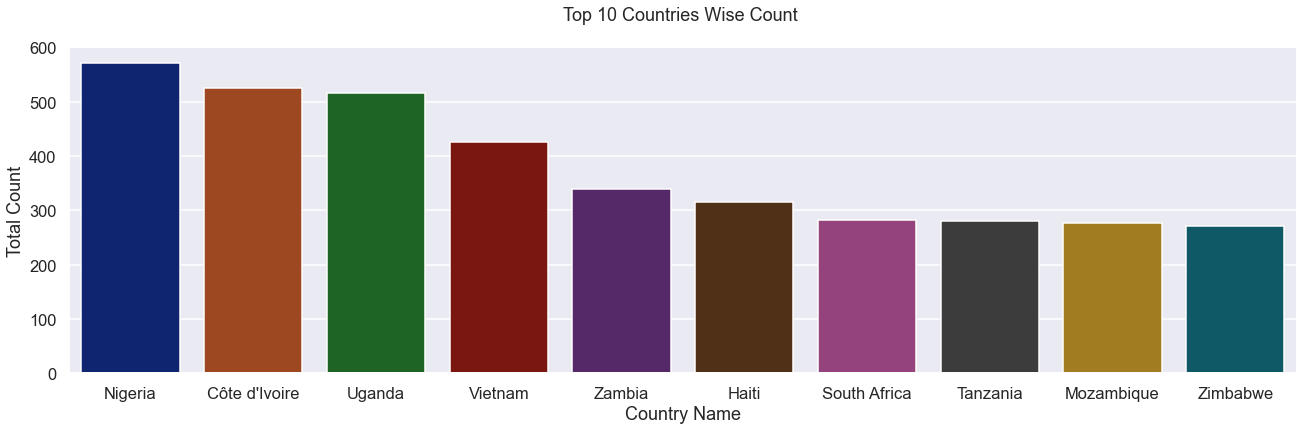

In [100]:
df = df.dropna()
ItemCount = df["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(df['Country'],order = df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# Total Pack price for top 15 Countries

Total Pack Price for Top 15 Countries

Country
Vietnam          8903.75
Uganda           7858.41
Nigeria          6813.85
Côte d'Ivoire    6588.52
Tanzania         3563.00
Haiti            3155.76
Rwanda           2977.08
Zambia           2811.54
Mozambique       2640.30
Zimbabwe         2196.80
Guyana           1646.91
South Africa     1466.45
Ethiopia          960.26
Congo, DRC        858.05
Guatemala         569.15
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

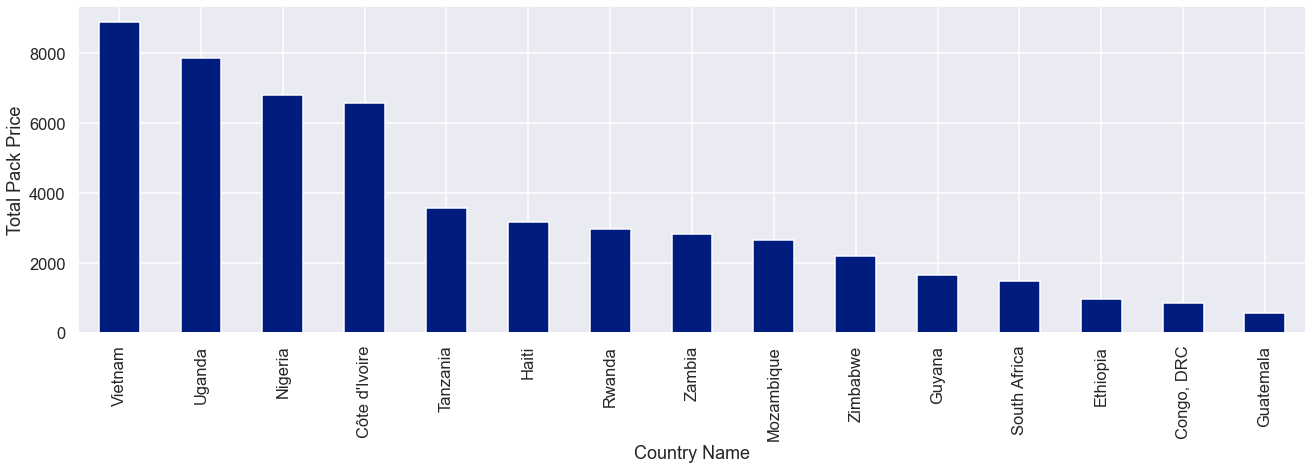

In [101]:
TotalPrice = df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

# Shipment Mode Percentage

In [102]:
ShippingMode = df["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

# Top 10 Largest Manufacturing Sites

Text(0.5, 0, 'Manufacturing Site Name')

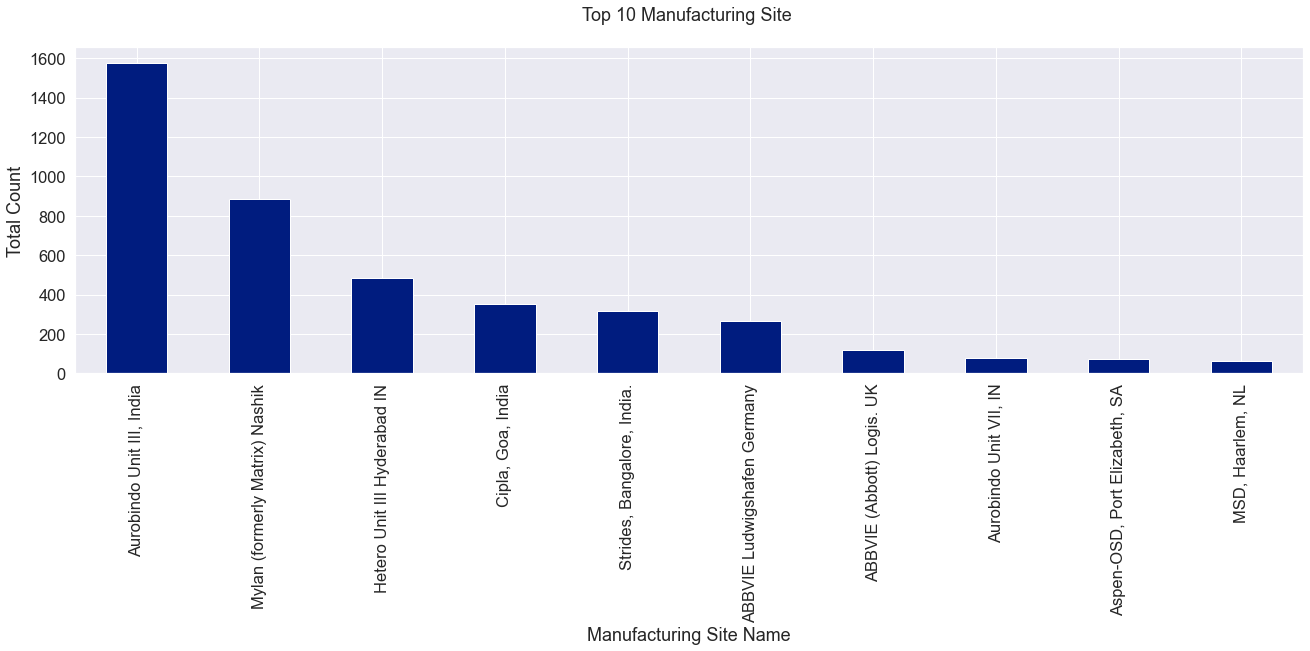

In [97]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

# Freight Cost per order by Country

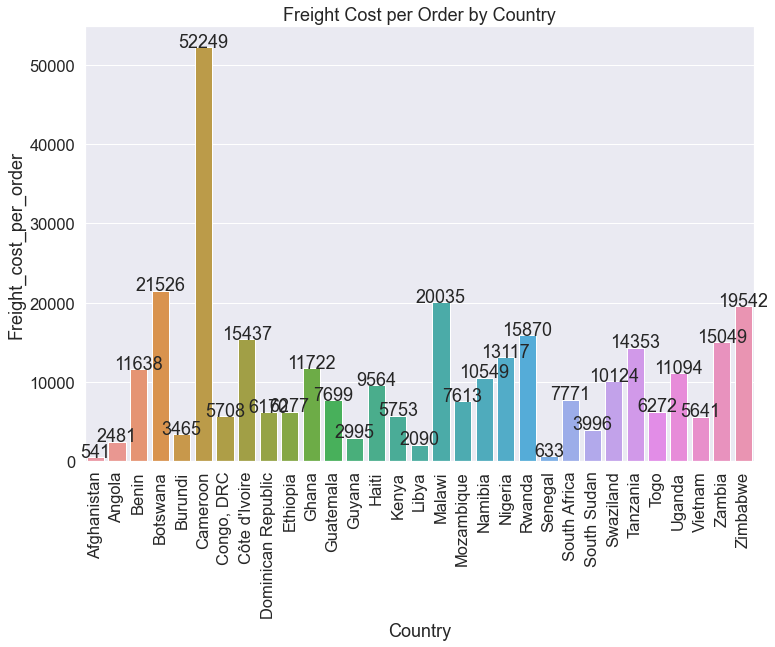

In [94]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette ='dark')

axes=sns.barplot(data=country,x='Country',y='Freight_cost_per_order',ci=None)
plt.title('Freight Cost per Order by Country')

for p in axes.patches:
    ht=p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2), y=ht+10,  ha='center',
             s='{:.0f}'.format(ht))
    
plt.xticks(rotation='vertical')
plt.show()

# Freight Cost per Order by Shipment Mode

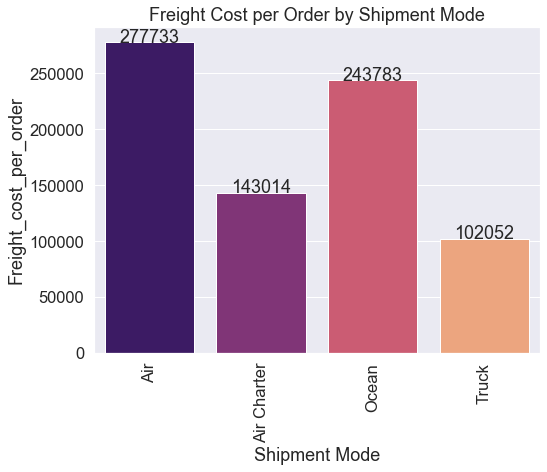

In [96]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5, palette ='dark')

axes=sns.barplot(data=country,x='Shipment Mode',y='Freight_cost_per_order',ci=None,
                 estimator=sum, palette='magma')
plt.title('Freight Cost per Order by Shipment Mode')

for p in axes.patches:
    ht=p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2), y=ht+10,  ha='center',
             s='{:.0f}'.format(ht))
    
plt.xticks(rotation='vertical')
plt.show()

# Top 10 Countries by Total Freight Cost (USD)

In [98]:
totalfreight=df.groupby('Country')['Freight Cost (USD)'].sum().nlargest(10).reset_index()
totalfreight

,Country,Freight Cost (USD)
0,Nigeria,9819252.74
1,Uganda,5065491.84
2,Côte d'Ivoire,4507695.61
3,Rwanda,4033630.92
4,Zambia,3763555.63
5,Zimbabwe,3686690.46
6,Haiti,3639738.73
7,Tanzania,2979156.33
8,South Africa,2448839.39
9,Vietnam,2403108.01


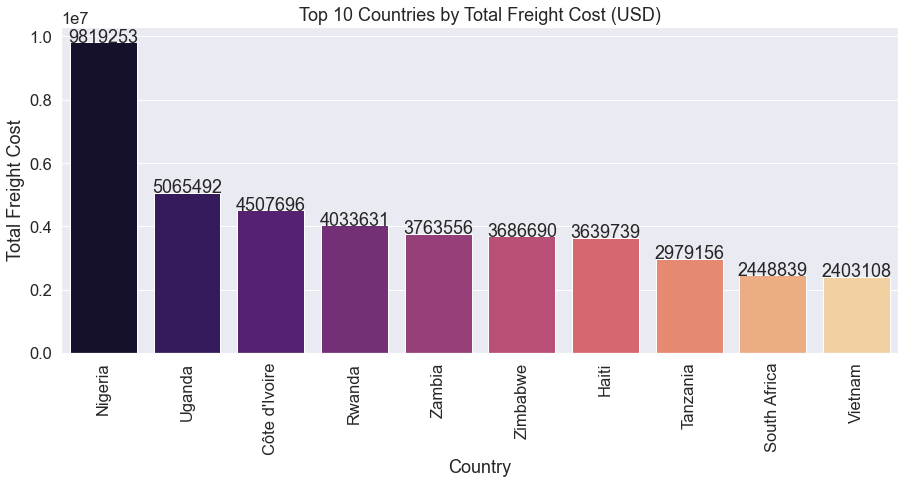

In [99]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5, palette ='dark')

axes=sns.barplot(data=totalfreight,x='Country',y='Freight Cost (USD)',ci=None,
                 estimator=sum, palette='magma')
plt.title('Top 10 Countries by Total Freight Cost (USD)')

for p in axes.patches:
    ht=p.get_height()
    axes.text(x=p.get_x()+(p.get_width()/2), y=ht+10,  ha='center',
             s='{:.0f}'.format(ht))

plt.xlabel('Country')
plt.ylabel('Total Freight Cost')
plt.xticks(rotation='vertical')
plt.show()